In [14]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR

import matplotlib.pyplot as plt


from RandomForest import *
from sklearn.ensemble import RandomForestClassifier

from sklearn.kernel_approximation import RBFSampler
from sklearn.svm import LinearSVC
from sklearn.gaussian_process.kernels import RBF

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame = False)


In [3]:
train_samples = 25000
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = train_samples, test_size = 3000)

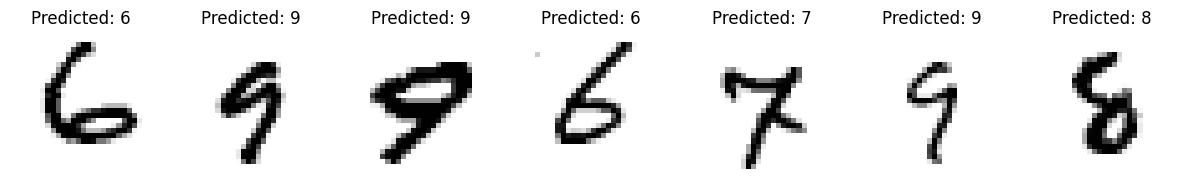

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=len(train_y[:7]), figsize = (15, 5))
for ax, image, label in zip(axes, train_x[:7], train_y[:7]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
    ax.set_title("Predicted: %s" % str(label))


In [5]:
KNN_classifiers = []
for i in range(10):
    KNN_classifiers.append(KNeighborsClassifier(i + 2))

In [6]:
def cross_val_score_mod(classifier, X, y, folds, shuffle = False):
    kf = KFold(n_splits = folds, shuffle = shuffle)
    trained_classifier = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train_kfold, X_test_kfold = X[train_index], X[test_index]
        y_train_kfold, y_test_kfold = y[train_index], y[test_index]
        classifier_fold = clone(classifier)
        classifier_fold.fit(X_train_kfold, y_train_kfold)
        prediction = classifier_fold.predict(X_test_kfold)
        accuracy = accuracy_score(y_test_kfold, prediction)
        trained_classifier.append(classifier_fold)
        accuracy_list.append(accuracy)
    return trained_classifier, accuracy_list

In [7]:
def check_classifier(classifier, X_train, y_train, X_val, y_val):
    trained_classifier, accuracy_list = cross_val_score_mod(classifier, X_train, y_train, 5)
    best_classifier = trained_classifier[np.argmax(accuracy_list)]
    accuracy = 0.0
    for i in range(len(accuracy_list)):
        accuracy += accuracy_score(y_val, trained_classifier[i].predict(X_val))
    print(accuracy_list)
    print("Accuracy %.4f" %  (accuracy / len(accuracy_list)))

    return best_classifier

In [8]:
def plot_confusion_matrix(predicted, y):
    confusion_matr = confusion_matrix(y, predicted)
    print(confusion_matr)

In [9]:
def show_predict_and_real(X, y):
    fig, axes = plt.subplots(nrows=1, ncols=len(y), figsize = (15, 5))
    for ax, image, label in zip(axes, X, y):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
        ax.set_title("Predicted: %s" % str(label))

In [10]:
def show_classifier_result(clf, X_train, y_train, X_val, y_val, show_number = True):
    best_clf = check_classifier(clf, X_train, y_train, X_val, y_val)
    Z = best_clf.predict(X_val)
    plot_confusion_matrix(y_val, Z)
    wrong_predictions = [i for i in np.arange(len(Z)) if Z[i] != y_val[i]]
    if show_number:
        show_predict_and_real(X_val[wrong_predictions][:8], Z[wrong_predictions][:8])

[0.9508, 0.956, 0.9512, 0.9498, 0.9516]
Accuracy 0.9482
[[306   0   2   1   0   2   3   0   5   2]
 [  1 331   4   0   5   0   1   4   6   0]
 [  0   0 307   3   1   1   1   1   2   0]
 [  0   0   1 279   0  13   0   0  12   2]
 [  0   0   0   0 287   0   0   2   4   9]
 [  0   0   1   0   0 230   3   0   9   2]
 [  1   0   0   1   0   0 277   0   5   0]
 [  0   1   6   4   0   0   0 318   3  10]
 [  0   0   0   1   0   0   0   0 248   2]
 [  0   0   0   1   2   0   0   0   1 276]]
[0.96, 0.962, 0.9586, 0.9596, 0.9624]
Accuracy 0.9595
[[305   0   1   0   0   1   1   0   1   2]
 [  1 331   3   1   5   2   1   2   6   1]
 [  0   0 307   5   3   1   0   1   2   0]
 [  0   0   1 277   0   7   0   1   6   2]
 [  0   0   0   0 277   0   0   1   3   7]
 [  0   0   1   1   0 230   0   0   7   1]
 [  2   0   0   2   0   1 283   0   0   0]
 [  0   1   7   2   0   0   0 315   1   5]
 [  0   0   0   2   0   3   0   0 266   1]
 [  0   0   1   0  10   1   0   5   3 284]]
[0.9588, 0.9588, 0.9588, 0.9

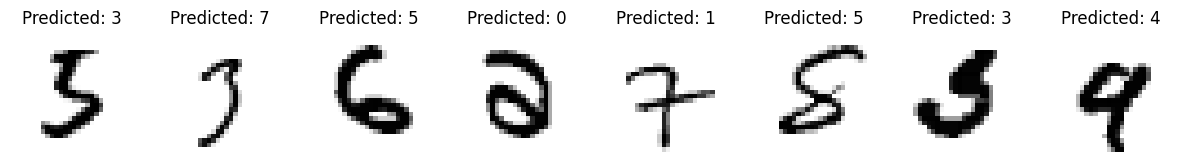

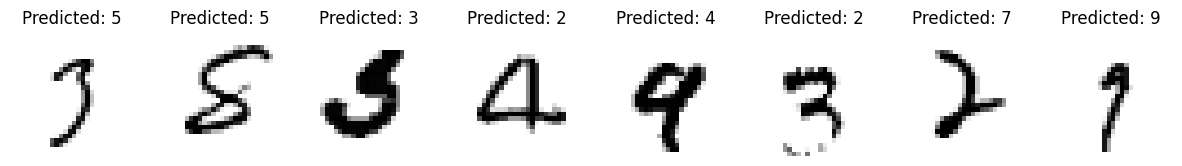

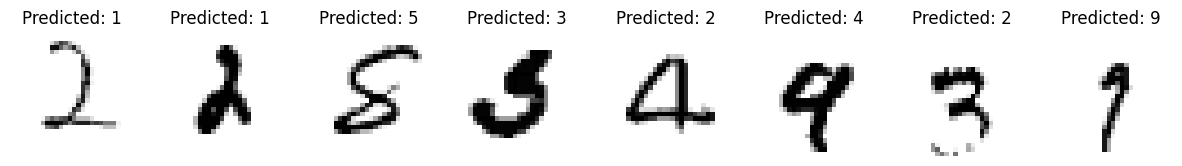

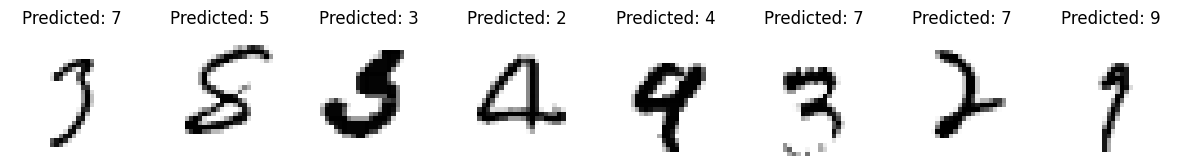

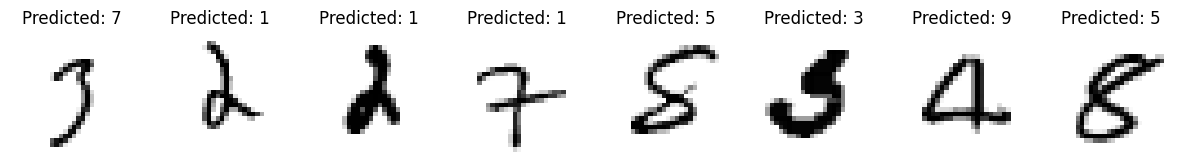

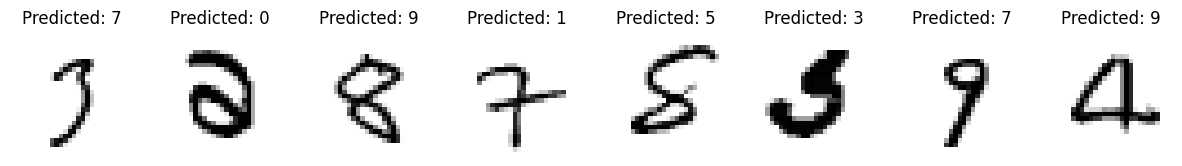

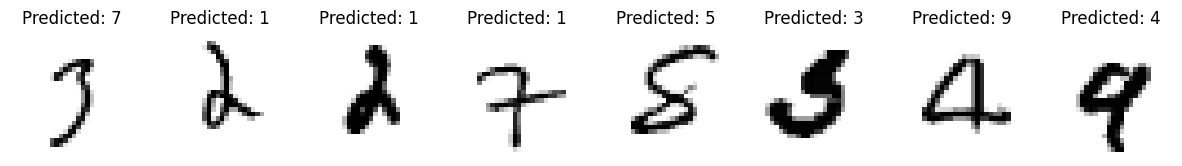

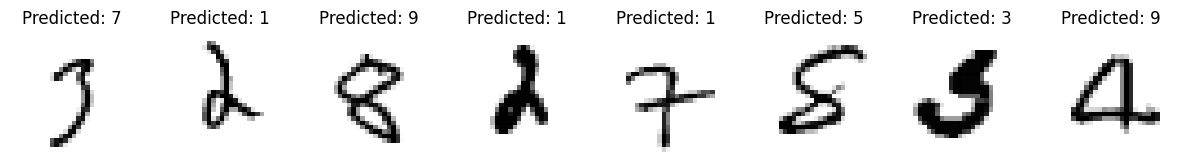

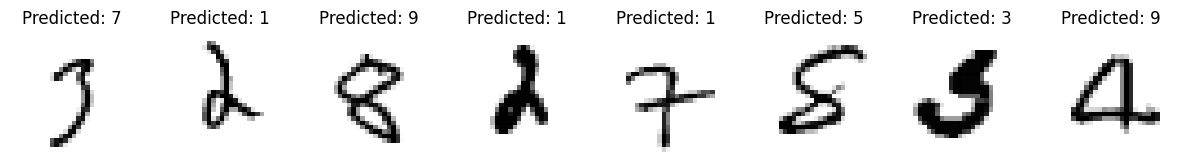

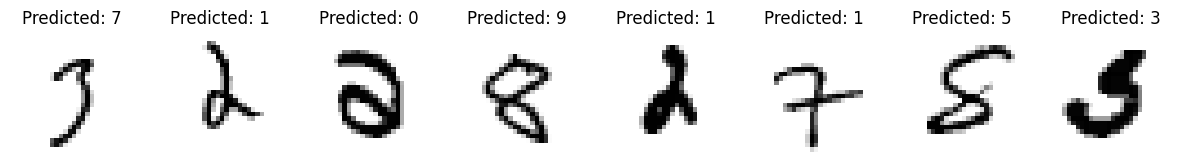

In [11]:
for i in range(len(KNN_classifiers)):
    show_classifier_result(KNN_classifiers[i], train_x, train_y, test_x, test_y)

In [12]:
DTC_classifiers = []
for i in range(10):
    DTC_classifiers.append(DecisionTreeClassifier(max_depth = i+1))

[0.1996, 0.195, 0.1838, 0.1922, 0.2084]
Accuracy 0.2028
[[300   9  47 199  43 158  67 235  26 105]
 [  8 323 274  91 252  88 218  90 269 198]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[0.3162, 0.3402, 0.3336, 0.3328, 0.3376]
Accuracy 0.3375
[[277   0  25  15  17  52  18  86  11  13]
 [  2 285  44  11  12   8  26  13 104  14]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 22  24  21 215  10  90  21  16  48  43]
 [  7  23 231  49 256  96 220 210 132 233]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[0.4618, 0.4222, 0.4538, 

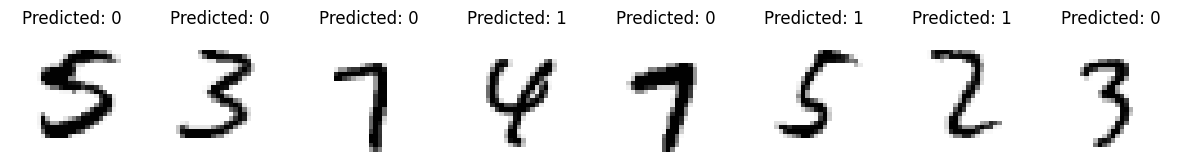

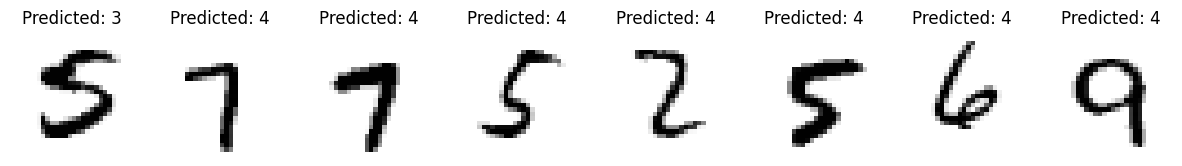

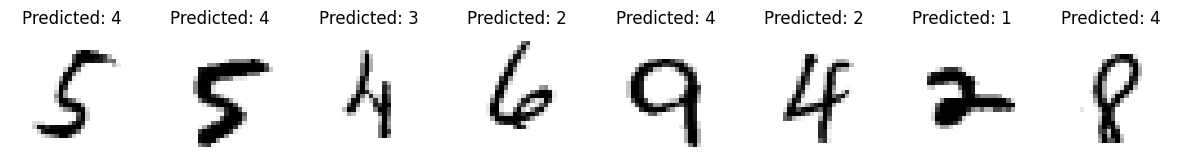

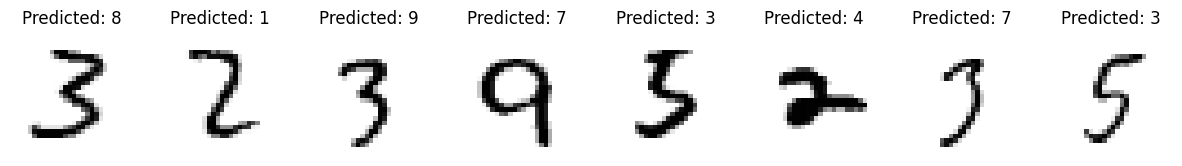

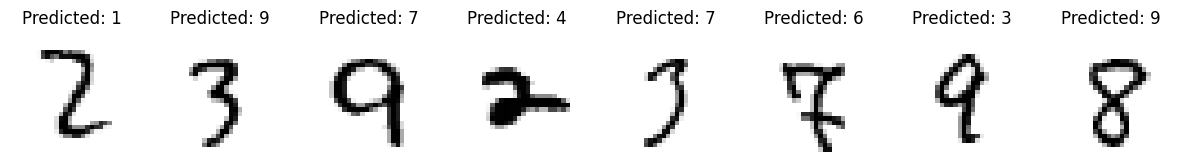

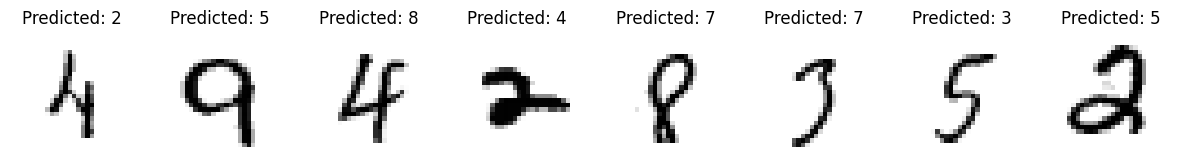

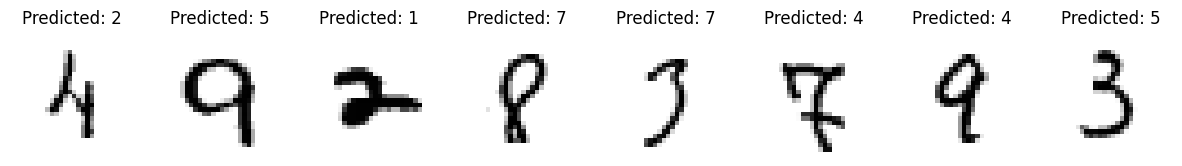

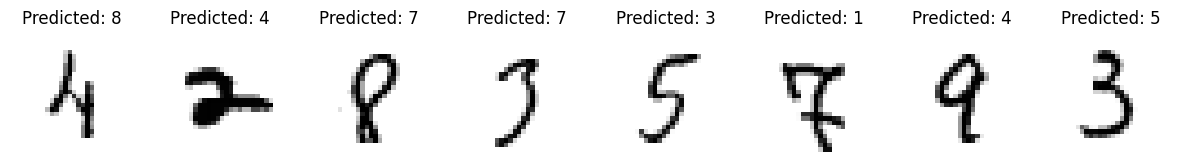

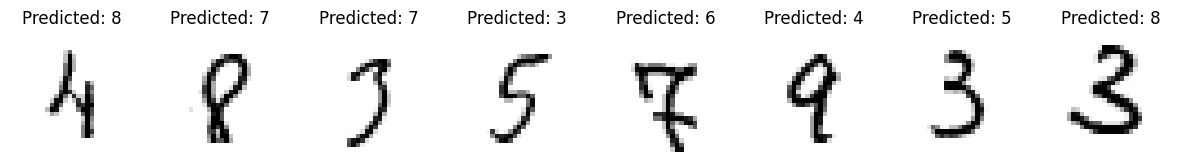

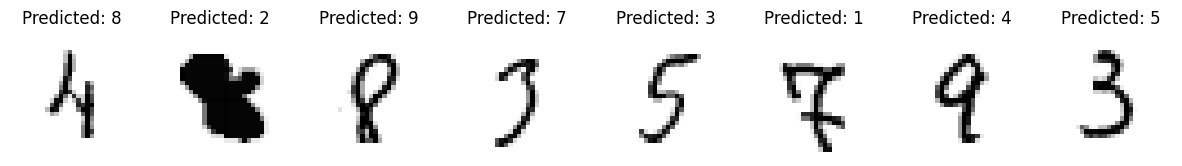

In [13]:
for i in range(len(DTC_classifiers)):
    show_classifier_result(DTC_classifiers[i], train_x, train_y, test_x, test_y)

### SVM

In [17]:
SVC_classifiers = []
SVC_kernels = {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
for sv_kernel in SVC_kernels:
    SVC_classifiers.append(SVC(kernel = sv_kernel))


### RBF Kernel

$\phi_{RBF}: \mathbb{R}^N \rightarrow \mathbb{R}^{\inf}$ 

$K_{rbf} = \exp{[-\frac{1}{2} || x - x' ||]} = C \cdot \sum_{n=0}^{\inf}\frac{K_{poly(n)}(x, x')}{n!}$

Decision function:
$$sign(\sum_{i=1}^{n}y_i\alpha_iK(x_i, x) + b)$$


$ sign(\omega^T\phi(x) + b), \omega = \sum_{i=1}^l \alpha_i y_i \phi(x_i) $

In [18]:

rbf_classifier = SVC()
rbf_classifier.fit(train_x, train_y)



SVC()

In [19]:
print(accuracy_score(test_y, rbf_classifier.predict(test_x)))
rbf_classifier.degree
print(rbf_classifier.dual_coef_.shape)


0.971
(9, 7020)


[0.9138, 0.9172, 0.9142, 0.9138, 0.9098]
Accuracy 0.9191
[[301   0   1   2   1   2   4   0   3   1]
 [  0 319   1   1   1   1   1   3   6   1]
 [  1   2 292   8   3   4   1   3   4   1]
 [  0   3   4 260   0  12   0   0  13   3]
 [  1   0   3   1 272   5   1   4   1   8]
 [  1   3   0   7   0 209   4   1   9   2]
 [  0   0   9   2   5   2 274   0   4   0]
 [  0   2   6   3   0   0   0 306   2  10]
 [  4   2   5   4   1   9   0   0 252   7]
 [  0   1   0   2  12   2   0   8   1 270]]


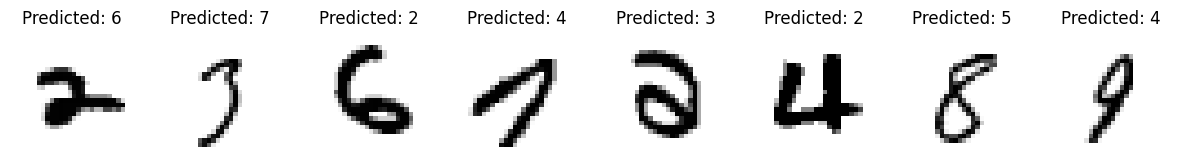

In [20]:
show_classifier_result(LogisticRegression(C = 50.0 / train_samples, penalty = "l1", solver = "saga", tol = 0.1), train_x, train_y, test_x, test_y)

$$S(R) = -\sum_{i=1}^{n} p_i \cdot \log{p_i}$$

$$Gain(A) = Info(S) - Info(S_A)$$

Info(S): $E_{parent} = -\sum_{i=1}^{n} p_i \cdot \log{p_i}$

Info(Sa): $\sum_{leaf}{ \frac{N_{leaf}}{N_{parent}} } \cdot E_{leaf}$

$$Gain = E_{parent} - \sum_{leaf}{ \frac{N_{leaf}}{N_{parent}} } \cdot E_{leaf}$$

Gini impurity
$$G = \sum_{k=1}^{C} p_k*(1 - p_k)$$

$$G = 1- \sum_{j} p_j^2$$


$$Gini_{sum} = \sum_{leaf}{\frac{N_{leaf}}{N_{parent}} \cdot Gini(leaf)}$$

### My Random Forest

In [21]:
my_RF = MyRandomForest(100, 1.0)
my_RF.fit(train_x, train_y)
predict_list  = my_RF.predict(test_x)
y  = test_y.astype(np.int64)
print(accuracy_score(y, predict_list))



0.9643333333333334


In [22]:
sk_rforest = RandomForestClassifier()
sk_rforest.fit(train_x, train_y)
y_pred_skrforest = sk_rforest.predict(test_x)
print(accuracy_score(test_y, y_pred_skrforest))

0.9656666666666667


: 